> # Potential Suicide Tweet Detection
-------------------------------------------------------------
> In this study, we analyze a dataset using multiple machine learning techniques and models. The primary dataset, referred to as 'data', undergoes preprocessing, while its copy, 'data_zero_shot', is reserved for zero-shot classification utilizing the Hugging Face pipeline (MoritzLaurer/bge-m3-zeroshot-v2.0).

**Classical Bag of Words and TfIdf:**

> We employ the following algorithms for text classification:

*   Naive Bayes: A probabilistic classifier based on applying Bayes' theorem.
*   SGD Classifier: A linear classifier optimized using stochastic gradient
    descent.
*   Logistic Regression: A statistical model that in its basic form uses a
    logistic function to model a binary dependent variable.

**Pretrained Glove Word Embeddings:**
> To enhance our models with semantic understanding, we use GloVe (Global Vectors for Word Representation) embeddings. We employ word-averaging to generate tweet encodings from word embeddings and use these embeddings as input features for our classifiers:

*    Logistic Regression: Utilized here as the primary classification algorithm
     to evaluate the effectiveness of word embeddings.

**Zero-shot using pretrained NLI model:**
> For the zero-shot classification task, we employ two different approaches:


*   Using a Pretrained NLI Model: We leverage a pretrained Natural Language Inference (NLI) model capable of classifying texts into categories not seen during training, offering a flexible approach to text classification without the need for extensive labeled data.
*   Using microsoft/Phi-3-mini-4k-instruc LLM: At the end of the notebook, we utilize the microsoft/Phi-3-mini-4k-instruc large language model (LLM) for zero-shot classification by providing it with specific instructions. This model allows us to extend our classification capabilities further, demonstrating the power of instruction-tuned LLMs in practical applications.

------------------------------------------------------------------------

In [5]:
import pandas as pd
import numpy as np
import string
string.punctuation
import matplotlib.pyplot as plt

In [6]:
# Loading dataset and drop Nan values
data = pd.read_csv("Suicide_Ideation_Dataset(Twitter-based).csv")
data_zero_shot = data
data_zero_shot = data_zero_shot.dropna()
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1785 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1785 non-null   object
dtypes: object(2)
memory usage: 41.8+ KB


In [7]:
# Picking random tweets from dataset
def ran_Tweet(data):
    i = np.random.randint(1,1700)
    return data['Tweet'][i], data['Suicide'][i]
ran_Tweet(data)

('I donâ\x80\x99t want to go back to school rn. I donâ\x80\x99t want to drive there. I donâ\x80\x99t want to do this stupid project. I just wâ\x80¦ https://t.co/7TpsU7S7QH',
 'Potential Suicide post ')

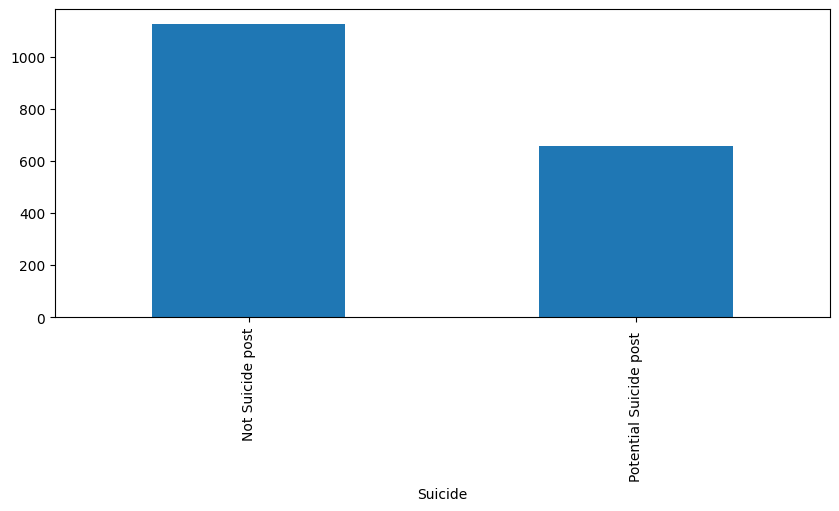

In [8]:
# Checking The Distribution of Labels
plt.figure(figsize=(10,4))
data.Suicide.value_counts().plot(kind='bar');

In [9]:
# Removing stopwords and unnecessary characters

import nltk
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

nltk.download('stopwords')

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

data['Tweet'] = data['Tweet'].apply(clean_text)
data['Tweet']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-9-b9c7a928a222>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


0                                            making lunch
1                                       alexia want money
2       dizzyhrvy crap took forever put together im go...
3       jnaylor #kiwitweets hey jer since start twitte...
4       trying delicious library 2 mixed results bar c...
                              ...                        
1782                       forgotten much love nokia n951
1783    starting day positive attitude great watch gre...
1784         belledame222 hey 5 amgive girl credit trying
1785    2 drunken besties stumble room run around sobe...
1786    dancingbonita friggin love ron burgundy riding...
Name: Tweet, Length: 1785, dtype: object

In [10]:
# Splitting the text of Tweets
data['Tweet'].apply(lambda x: len(x.split(' '))).sum()
data['Tweet']

0                                            making lunch
1                                       alexia want money
2       dizzyhrvy crap took forever put together im go...
3       jnaylor #kiwitweets hey jer since start twitte...
4       trying delicious library 2 mixed results bar c...
                              ...                        
1782                       forgotten much love nokia n951
1783    starting day positive attitude great watch gre...
1784         belledame222 hey 5 amgive girl credit trying
1785    2 drunken besties stumble room run around sobe...
1786    dancingbonita friggin love ron burgundy riding...
Name: Tweet, Length: 1785, dtype: object

In [11]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X = data.Tweet
y = data.Suicide
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1249,) (1249,)
(536,) (536,)


In [13]:
# Naive bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import time

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=data['Suicide'].unique()))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
accuracy 0.9160447761194029
                         precision    recall  f1-score   support

       Not Suicide post       0.94      0.92      0.93       338
Potential Suicide post        0.87      0.90      0.89       198

               accuracy                           0.92       536
              macro avg       0.91      0.91      0.91       536
           weighted avg       0.92      0.92      0.92       536



In [14]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=data['Suicide'].unique()))


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
accuracy 0.9477611940298507
                         precision    recall  f1-score   support

       Not Suicide post       0.96      0.96      0.96       338
Potential Suicide post        0.93      0.93      0.93       198

               accuracy                           0.95       536
              macro avg       0.94      0.94      0.94       536
           weighted avg       0.95      0.95      0.95       536



In [15]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=data['Suicide'].unique()))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
accuracy 0.9496268656716418
                         precision    recall  f1-score   support

       Not Suicide post       0.97      0.95      0.96       338
Potential Suicide post        0.92      0.94      0.93       198

               accuracy                           0.95       536
              macro avg       0.94      0.95      0.95       536
           weighted avg       0.95      0.95      0.95       536



In [16]:
def predict_sentence(sentence, model):
    prediction = model.predict([sentence])
    return prediction[0]

In [17]:
sentence1 = "I'm trying to find a way to carry on"
sentence2 = "I'm so sick of this days"

predicted_label_sgd1 = predict_sentence(sentence1, sgd)
predicted_label_sgd2 = predict_sentence(sentence2, sgd)
predicted_label_nb1 = predict_sentence(sentence1, nb)
predicted_label_nb2 = predict_sentence(sentence2, nb)
predicted_label_log1 = predict_sentence(sentence1, logreg)
predicted_label_log2 = predict_sentence(sentence2, logreg)


print(f'The predicted label for the sentence is: {predicted_label_sgd1}')
print(f'The predicted label for the sentence is: {predicted_label_nb1}')
print(f'The predicted label for the sentence is: {predicted_label_log1}')

print(f'The predicted label for the sentence is: {predicted_label_sgd2}')
print(f'The predicted label for the sentence is: {predicted_label_nb2}')
print(f'The predicted label for the sentence is: {predicted_label_log2}')

The predicted label for the sentence is: Not Suicide post
The predicted label for the sentence is: Not Suicide post
The predicted label for the sentence is: Not Suicide post
The predicted label for the sentence is: Potential Suicide post 
The predicted label for the sentence is: Potential Suicide post 
The predicted label for the sentence is: Potential Suicide post 


In [18]:
# Downloading glove
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-100")
word_vectors.fill_norms()

In [19]:
from itertools import islice
list(islice(word_vectors.key_to_index, 13030, 13050))

['innovations',
 'penh',
 'bangalore',
 'freshwater',
 'hurled',
 'kerr',
 'inspected',
 'caspian',
 'turbulent',
 'holyfield',
 'workout',
 'beacon',
 'groin',
 'newswires',
 'scrambled',
 'escaping',
 'deepen',
 'yunnan',
 'amend',
 'discography']

In [20]:
import numpy as np
import logging

# nltk.download('punkt')

def word_averaging(wv, words):
    all_words, mean = set(), []

    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.key_to_index:
            mean.append(wv[word])  # Access the word vector directly
            all_words.add(wv.key_to_index[word])

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        return np.zeros(wv.vector_size,)

    mean = np.array(mean).mean(axis=0)
    return mean

def word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])


In [21]:
import nltk

def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

train, test = train_test_split(data, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['Tweet']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['Tweet']), axis=1).values

X_train_word_average = word_averaging_list(word_vectors,train_tokenized)
X_test_word_average = word_averaging_list(word_vectors,test_tokenized)

In [22]:
# from sklearn.linear_model import LogisticRegression
logregWv = LogisticRegression(n_jobs=1, C=1e5)
logregWv = logregWv.fit(X_train_word_average, train['Suicide'])
y_pred = logregWv.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.Suicide))
print(classification_report(test.Suicide, y_pred,target_names=data['Suicide'].unique()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.8861940298507462
                         precision    recall  f1-score   support

       Not Suicide post       0.89      0.93      0.91       338
Potential Suicide post        0.88      0.80      0.84       198

               accuracy                           0.89       536
              macro avg       0.88      0.87      0.88       536
           weighted avg       0.89      0.89      0.89       536



In [23]:
!nvidia-smi

Sat May 25 13:08:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0              27W /  70W |   7393MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [24]:
import re

In [25]:
fix_quot = lambda tweet: tweet.replace("&quot;", " \"")
remove_link = lambda tweet: re.sub(r'https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
normalize_whitespace = lambda tweet: re.sub('\s\s+', ' ', tweet).strip()

In [26]:
data_zero_shot['Tweet'] = data_zero_shot.Tweet.apply(remove_link).apply(fix_quot).apply(normalize_whitespace)

In [27]:
data_zero_shot.drop(data_zero_shot.index[~data_zero_shot.Tweet.astype('bool')], inplace=True)

In [28]:
import torch
device = torch.device('cuda')

In [29]:
from transformers import pipeline
hypothesis_template = "This tweet is from a {}:"
classes_verbalized = ["potentially suicidal person", "stable person"]
zeroshot_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/deberta-v3-large-zeroshot-v2.0", device=device)  # change the model identifier here

In [30]:
# Perform classification and calculate accuracy
# label from data:label from zero-shot

label_map = {
    "Not Suicide post": "stable person",
    "Potential Suicide post ": "potentially suicidal person"
    }
correct_predictions = 0
predictions = 0
total_samples = len(data_zero_shot)
print('The size of sample is: ',total_samples)

for index, row in data_zero_shot.iterrows():
    text = row["Tweet"]
    true_label = row["Suicide"]

    # Perform zero-shot classification
    output = zeroshot_classifier(text, classes_verbalized, hypothesis_template=hypothesis_template, multi_label=False)

    # Get the predicted label
    predicted_label = output["labels"][0]

    # Check if the predicted label matches the true label
    if predicted_label == label_map[true_label]:
        correct_predictions += 1
    else:
      print(output)
    predictions += 1
    print(predictions, correct_predictions, round(correct_predictions/predictions, 3))

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f"Accuracy: {accuracy:.2f}")

The size of sample is:  1777
1 1 1.0
2 2 1.0
3 3 1.0
4 4 1.0
5 5 1.0
6 6 1.0
7 7 1.0
{'sequence': '@jakepaul @jamescharles @LoganPaul Just because shane made a Series on you Doesnt mean people take you seriously, yâ\x80¦', 'labels': ['stable person', 'potentially suicidal person'], 'scores': [0.6978113651275635, 0.30218860507011414]}
8 7 0.875
9 8 0.889


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


10 9 0.9
11 10 0.909
12 11 0.917
13 12 0.923
14 13 0.929
15 14 0.933
16 15 0.938
17 16 0.941
18 17 0.944
19 18 0.947
20 19 0.95
21 20 0.952
22 21 0.955
23 22 0.957
24 23 0.958
25 24 0.96
26 25 0.962
27 26 0.963
28 27 0.964
29 28 0.966
30 29 0.967
31 30 0.968
32 31 0.969
33 32 0.97
34 33 0.971
35 34 0.971
36 35 0.972
37 36 0.973
{'sequence': 'RT @tamicakeyona: Being a single mommy was never part of the plan but I wake up everyday and do my shitð\x9f\x92ªð\x9f\x8f¾', 'labels': ['stable person', 'potentially suicidal person'], 'scores': [0.8594267964363098, 0.1405731439590454]}
38 36 0.947
{'sequence': 'But what Bezos, de Blasio, and Cuomo have down is walked into our little lego town, kicked all of our lego towers aâ\x80¦', 'labels': ['stable person', 'potentially suicidal person'], 'scores': [0.6057927012443542, 0.394207239151001]}
39 36 0.923
40 37 0.925
41 38 0.927
42 39 0.929
43 40 0.93
44 41 0.932
45 42 0.933
46 43 0.935
47 44 0.936
48 45 0.938
49 46 0.939
50 47 0.94
51 48 0.941
52 

In [31]:
# pip install accelerate

In [1]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [32]:
def predict_tweet_phi3(tweet):
  messages = [
      {"role": "user", "content": "Given the two classes 'Potential Suicide post' and 'Not Suicide post', Classify the following tweet: {}. Only provide the prediction label.".format(tweet)},
  ]

  pipe = pipeline(
      "text-generation",
      model=model,
      tokenizer=tokenizer,
  )

  generation_args = {
      "max_new_tokens": 500,
      "return_full_text": False,
      "temperature": 0.0,
      "do_sample": False,
  }

  output = pipe(messages, **generation_args)
  return output[0]['generated_text']

In [33]:
# Perform classification and calculate accuracy

correct_predictions = 0
predictions = 0
total_samples = len(data_zero_shot)
print('The size of sample is: ',total_samples)

for index, row in data_zero_shot.iterrows():
    text = row["Tweet"]
    true_label = row["Suicide"].strip()

    # Perform zero-shot classification
    output = predict_tweet_phi3(text).strip()
    # Check if the predicted label matches the true label
    if output == true_label:
        correct_predictions += 1
    else:
      print(text, true_label, output)
    predictions += 1
    print(predictions, correct_predictions, round(correct_predictions/predictions, 3))

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f"Accuracy: {accuracy:.2f}")

The size of sample is:  1777


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


1 1 1.0
2 2 1.0
@dizzyhrvy that crap took me forever to put together. iâm going to go sleep for DAYS Potential Suicide post Not Suicide post
3 2 0.667
4 3 0.75
5 4 0.8
6 5 0.833
7 6 0.857
@jakepaul @jamescharles @LoganPaul Just because shane made a Series on you Doesnt mean people take you seriously, yâ¦ Potential Suicide post Not Suicide post
8 6 0.75
9 7 0.778
10 8 0.8
11 9 0.818
12 10 0.833
13 11 0.846
I have an awful habit of avoiding writing papers by watching Instagram live videos of the kids I used to nanny forâ¦ Potential Suicide post Not Suicide post
14 11 0.786
15 12 0.8
16 13 0.812
17 14 0.824
18 15 0.833
SOMEBODY PLEASE FUCKING KILL ME IM SO IN LOVE Potential Suicide post Not Suicide post
19 15 0.789
20 16 0.8
@sadegsi,ger/rus/eng,I want to die so much, I dont want to be here anymore Potential Suicide post Not Suicide post
21 16 0.762
22 17 0.773
RT @Soulwhisperer3: When you're tired of living your life, all you can do is close your eyes and go to sleep... Potential Sui

### Summary of Results

1. **Classical Bag of Words and TfIdf Models**:
   - **Naive Bayes, SGD Classifier, Logistic Regression**: These models performed reasonably well on our dataset, demonstrating good accuracy. However, they lacked generalization and were not suitable for practical applications due to their dependence on the specific training data.

2. **Pretrained GloVe Word Embeddings**:
   - When using word-averaging for tweet encoding, the performance was similar to the classical models, but with even lower scores. This indicates that the GloVe embeddings did not significantly enhance the classification accuracy in our context.

3. **Zero-shot Classification using Pretrained NLI Model**:
   - This approach yielded the best results, achieving an accuracy of 87% on unseen data. The zero-shot capability of the NLI model provided robust performance without the need for extensive labeled training data, making it a highly effective method for our task.

4. **Zero-shot Classification using microsoft/Phi-3-mini-4k-instruc LLM**:
   - Despite the potential of instruction-tuned LLMs, this model did not perform well with our specific instructions, resulting in a score of 75%. This suggests that the model may require further tuning or different instructional approaches to achieve better performance. For the enhacement purposes, you can modify the instruction of the LLM and analyze the performance.

------------------------------------------------------------
## Conclusion

>In this notebook, we explored and compared various machine learning techniques for text classification, including classical models, pretrained word embeddings, and advanced zero-shot learning methods.

> The comparison of these techniques highlights the strengths and limitations of each approach. Classical models like Bag of Words and TfIdf, along with GloVe embeddings, showed limited generalization capabilities. The zero-shot NLI model demonstrated superior performance, making it the most effective method for our text classification task. Conversely, the instruction-tuned LLM did not meet expectations, indicating the need for further research and refinement in leveraging such models for practical applications.

> Future work may involve experimenting with other zero-shot models, fine-tuning LLMs, and exploring hybrid approaches to improve classification accuracy and generalization.
